<a href="https://colab.research.google.com/github/JerryAnggara/Skripsi_Perhitungan_Suara_CV/blob/main/Model%20Training/Object%20Detection/Yolov10s_Training_Model_3_Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Skripsi: Dataset Baru - Test Training Mdoel YoloV8

In [ ]:
!nvidia-smi

Fri May 23 13:57:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.6/112.6 GB disk)


In [ ]:
import os
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7e1kBC6srdwaqLDGRSP4")
project = rf.workspace("skripsi-2025-dnrgq").project("skripsi2025-pre1")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=train model=yolov10s.pt data=/content/Skripsi2025---Pre1-2/data.yaml epochs=50 imgsz=640 batch=32

100% 15.9M/15.9M [00:00<00:00, 104MB/s] 
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Skripsi2025---Pre1-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10

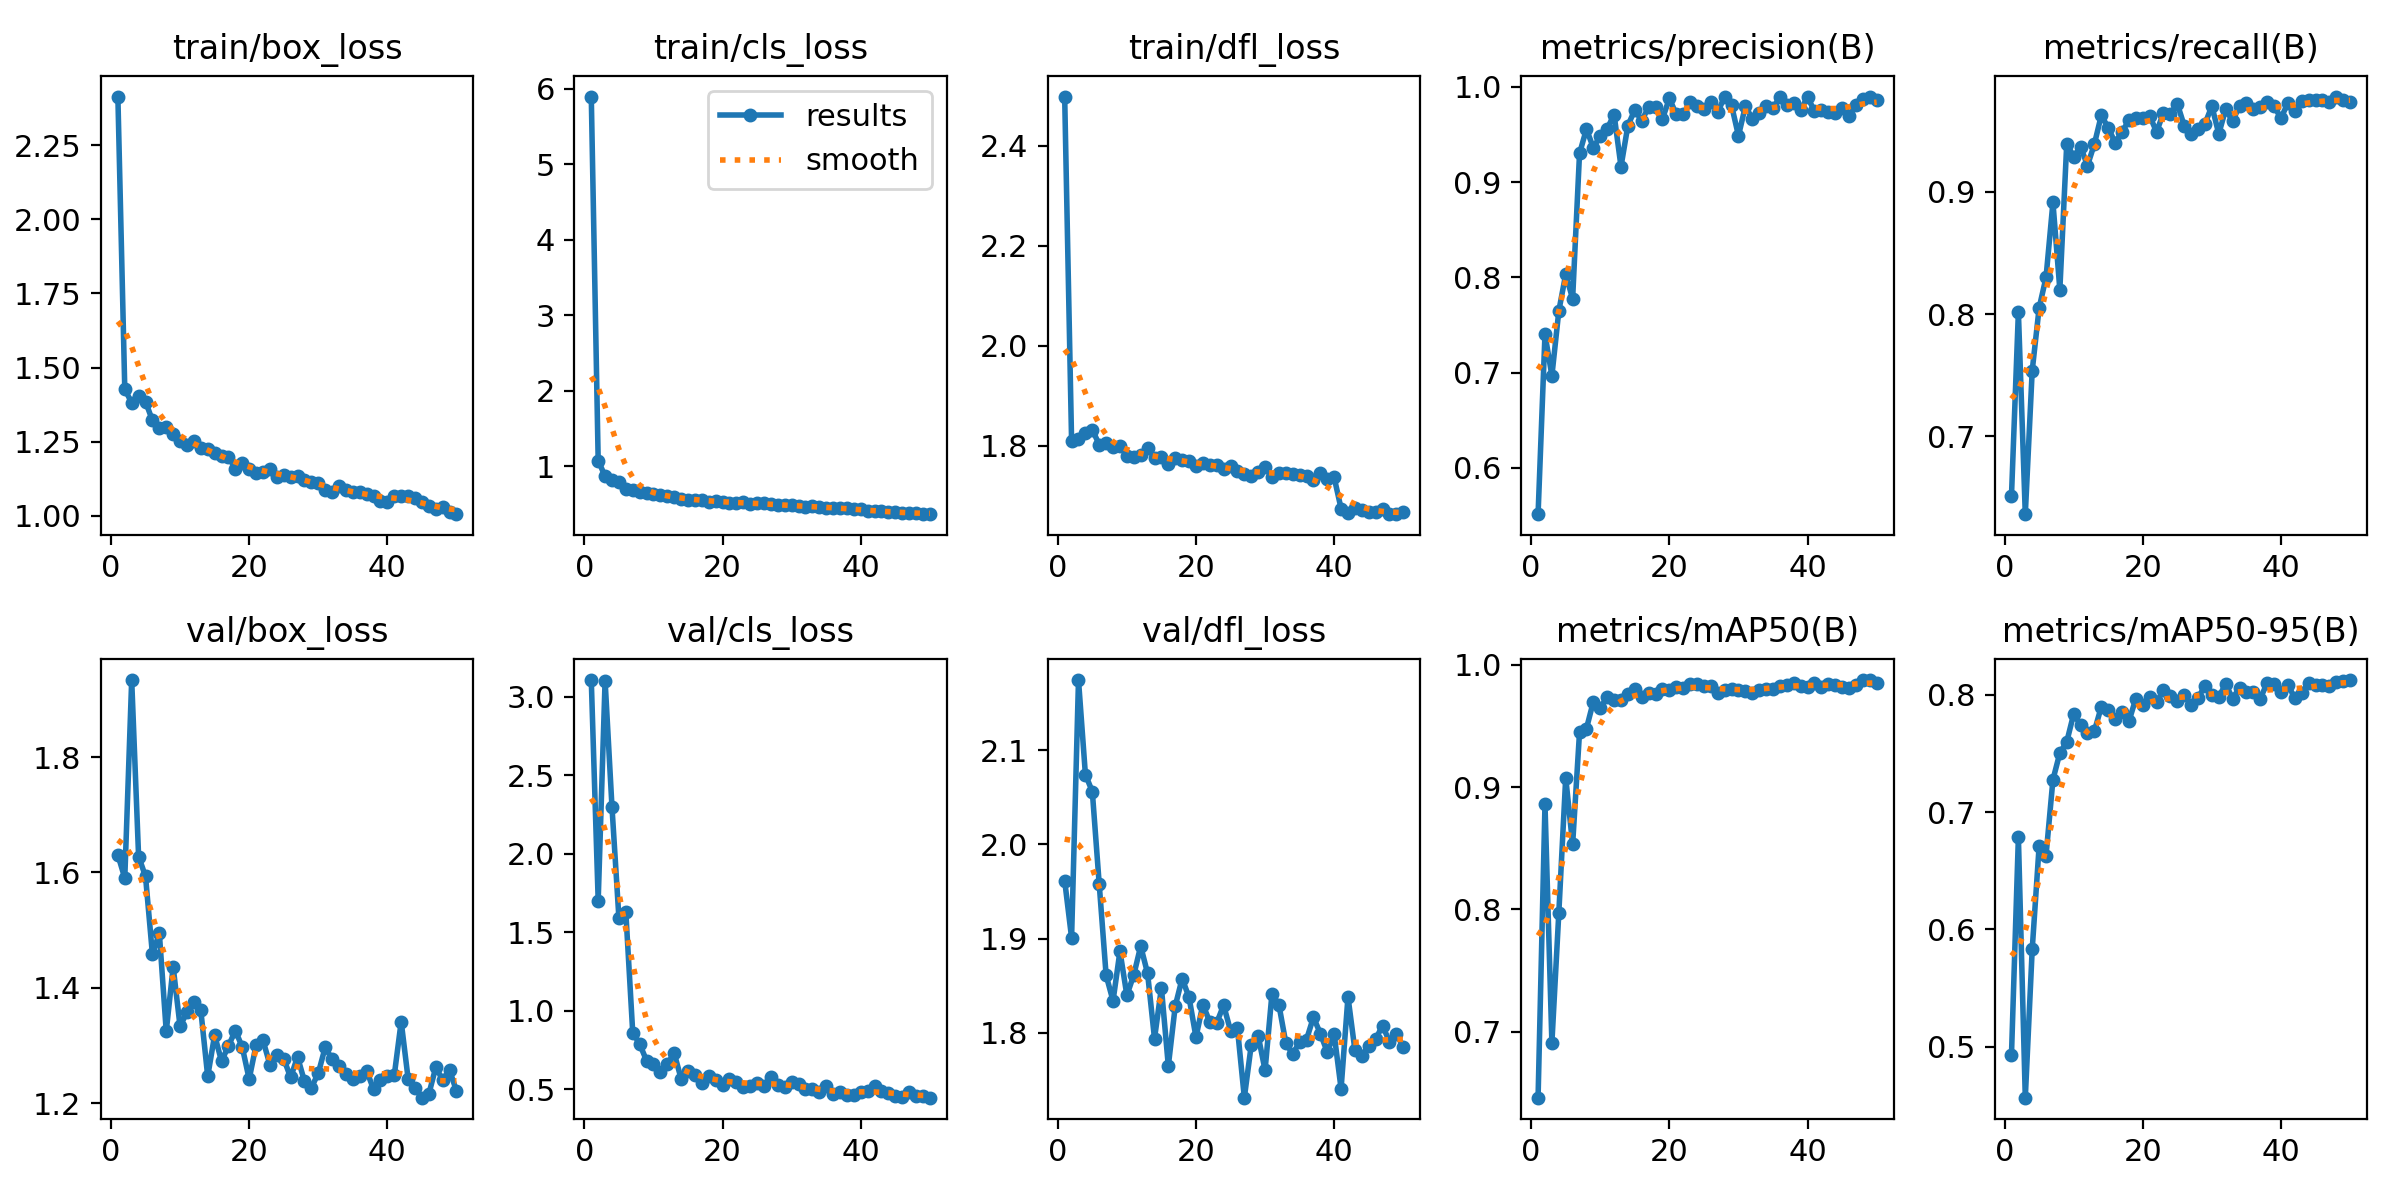

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=800)

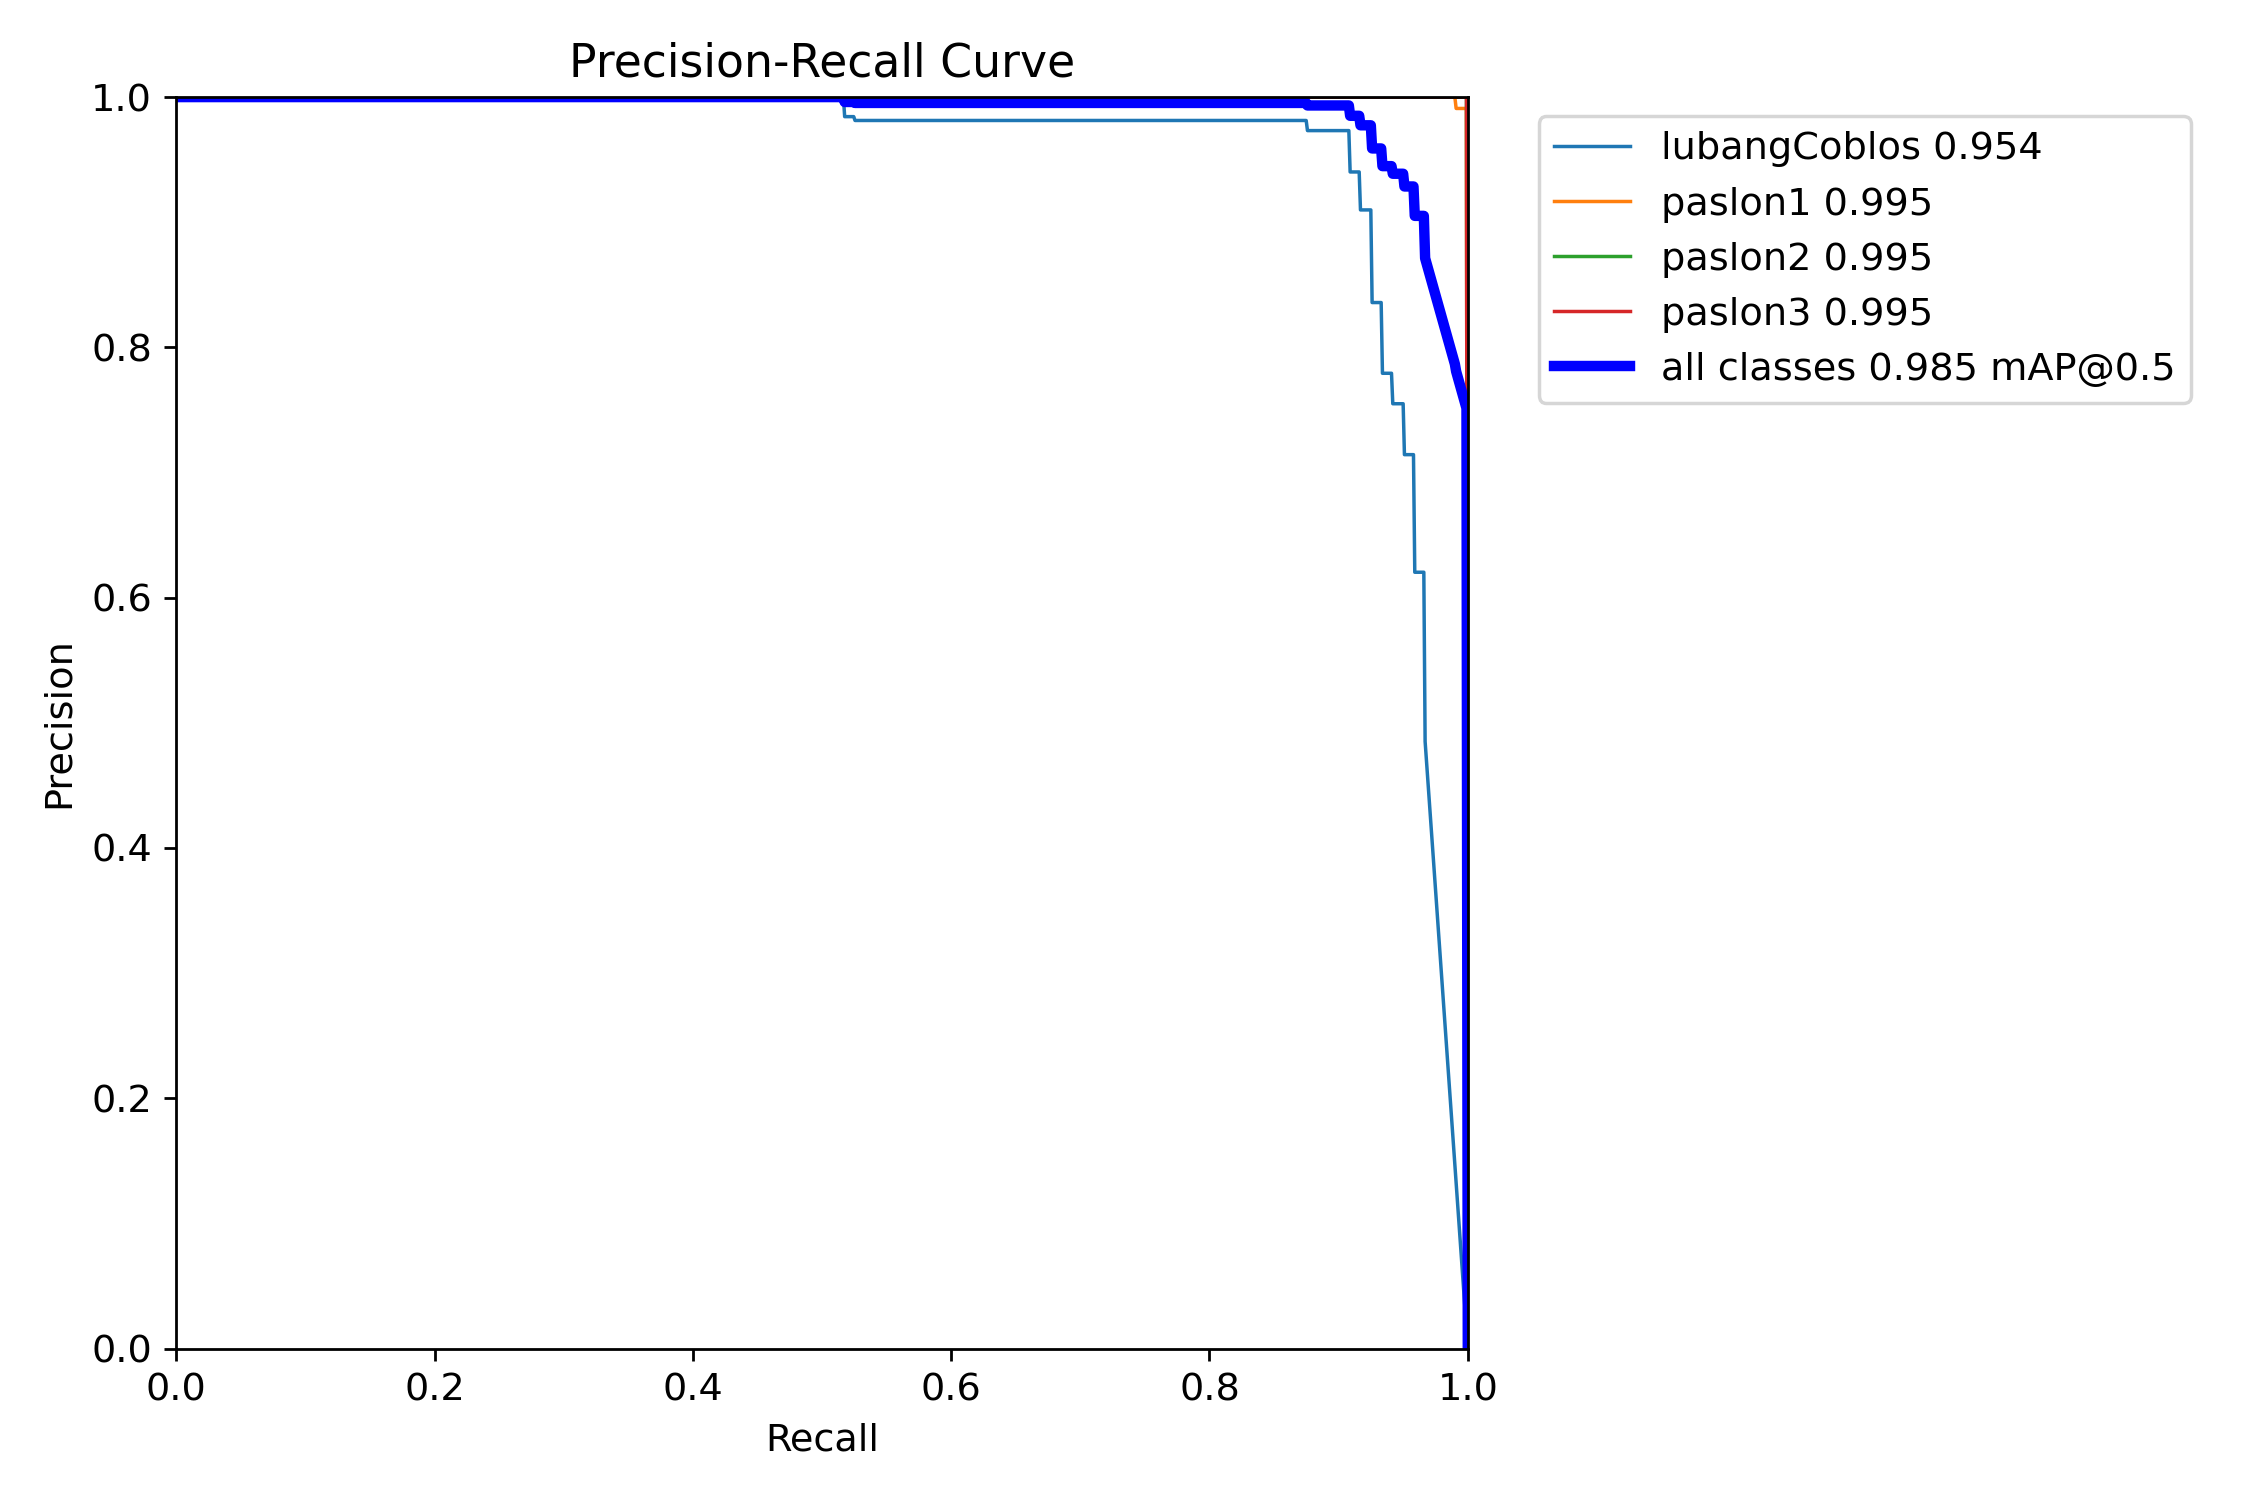

In [ ]:
Image(filename=f'/content/runs/detect/train/PR_curve.png', width=800)

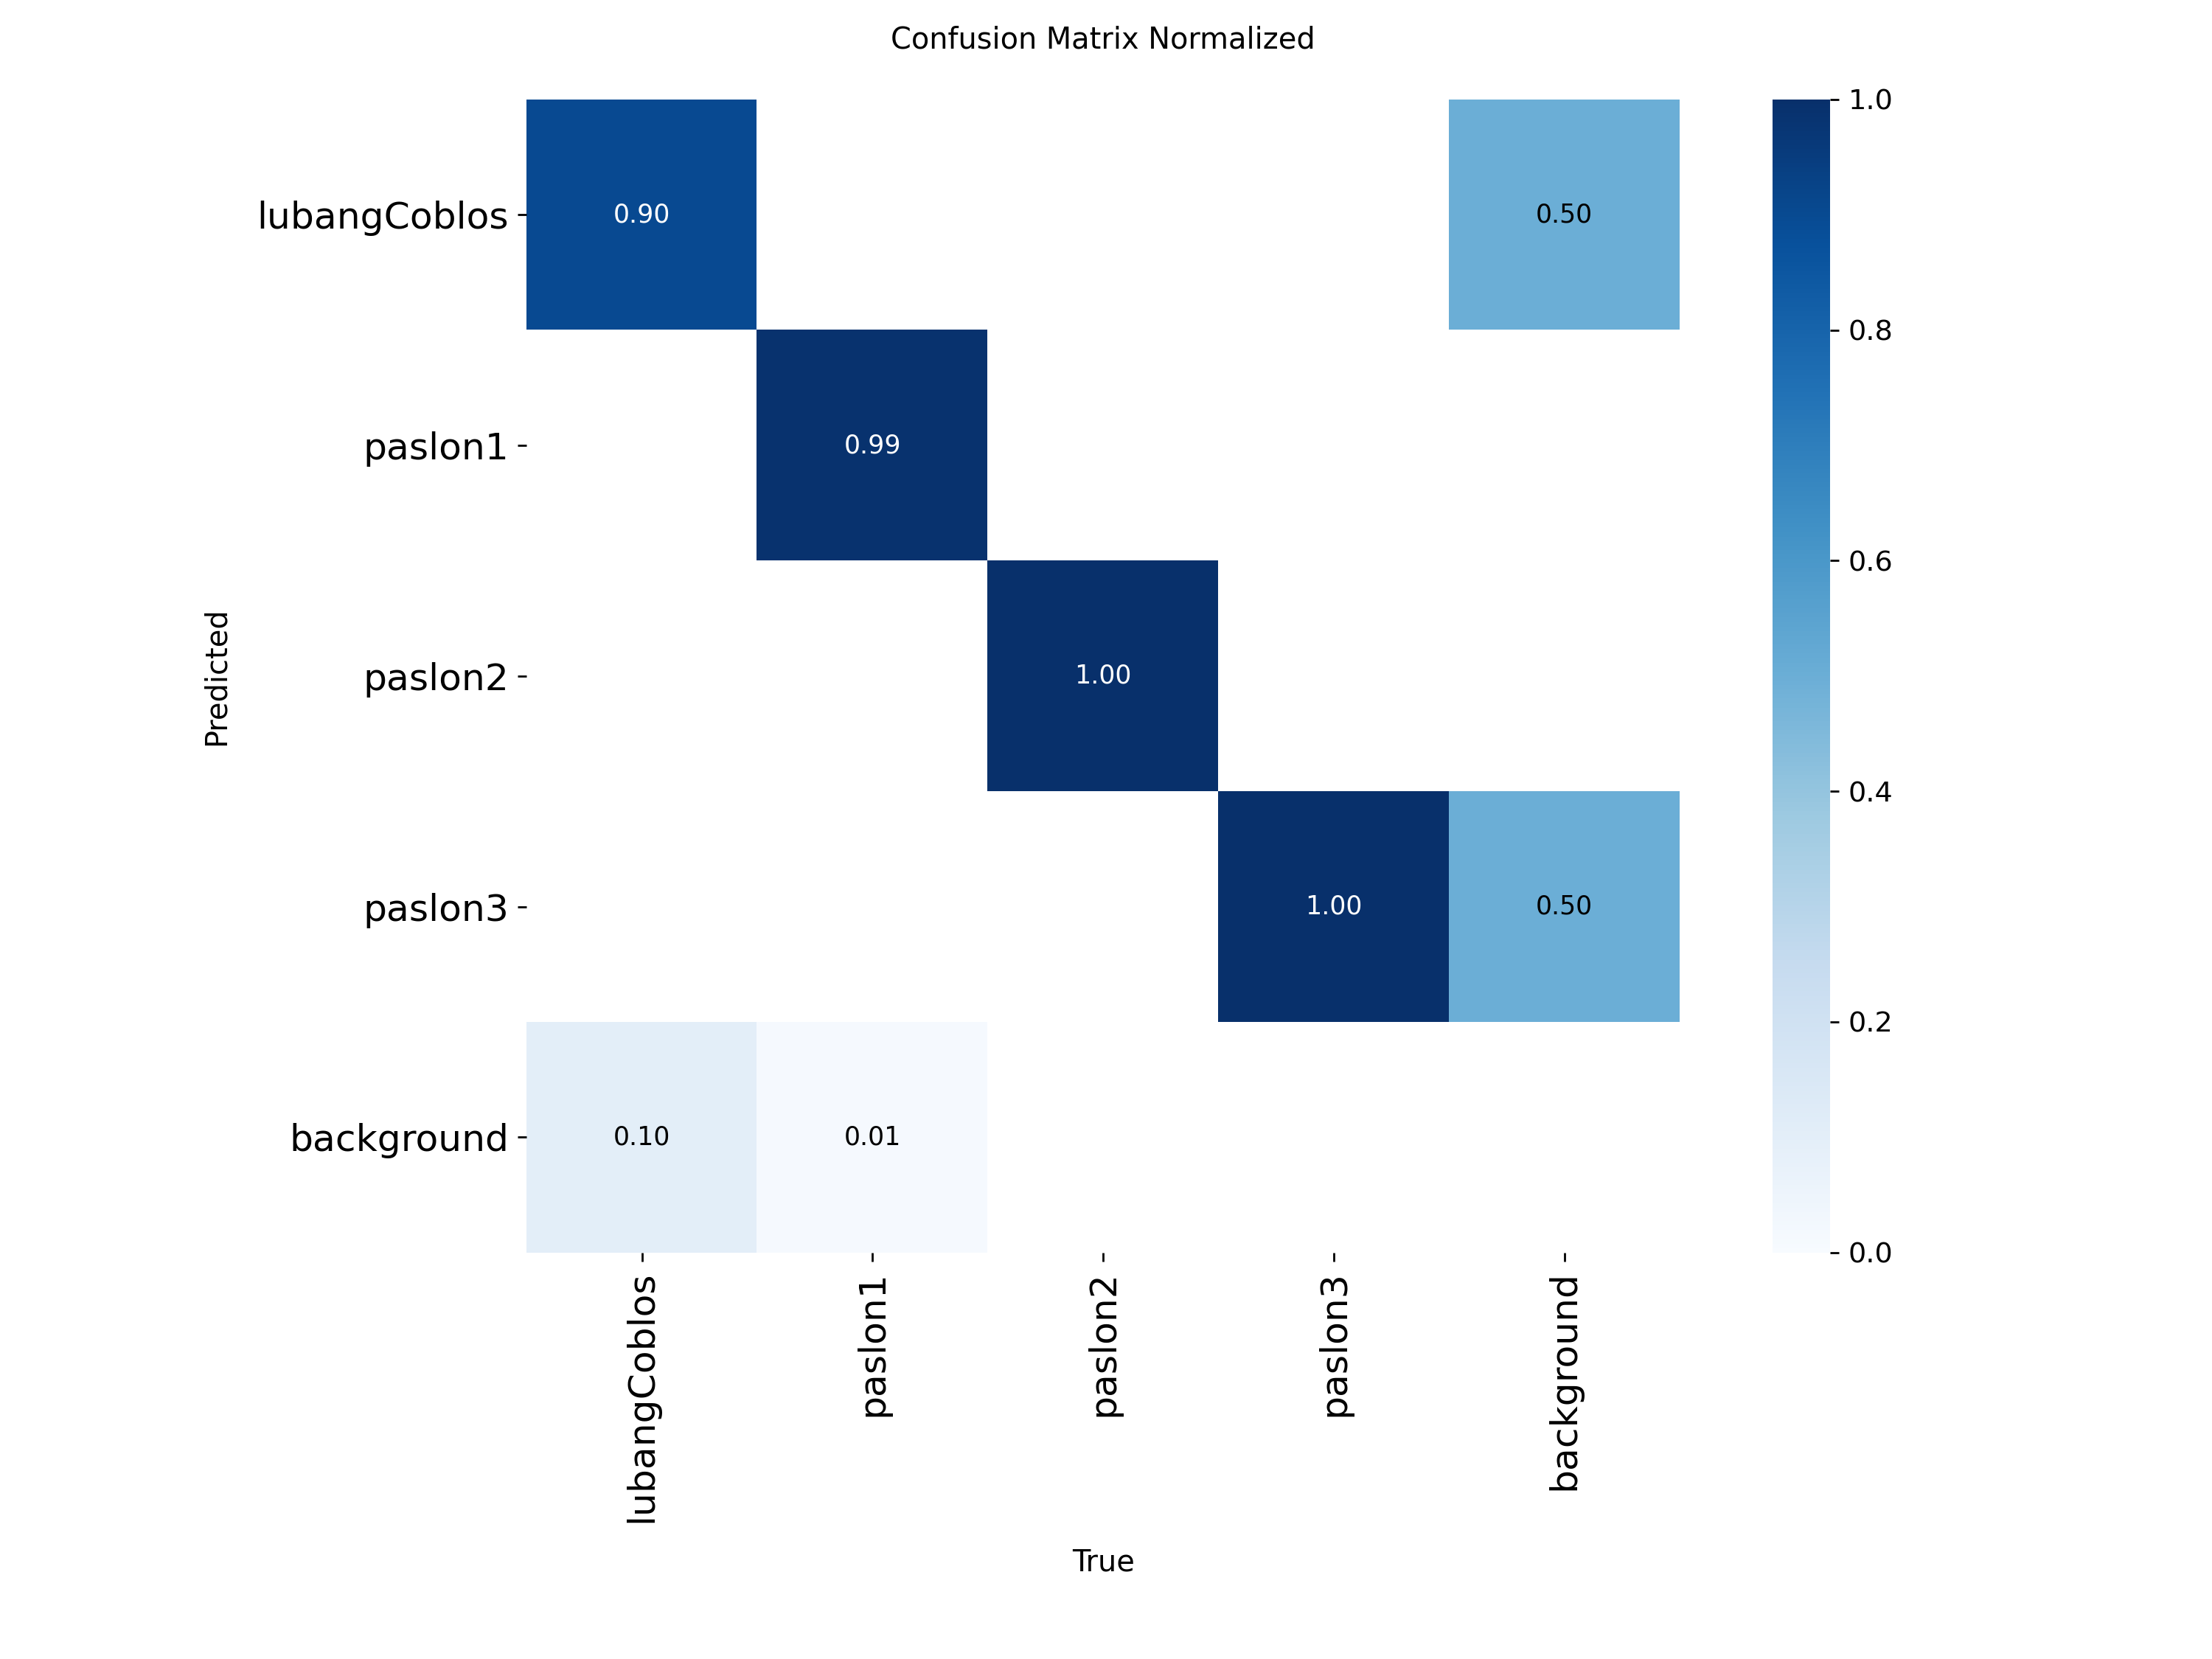

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix_normalized.png', width=800)

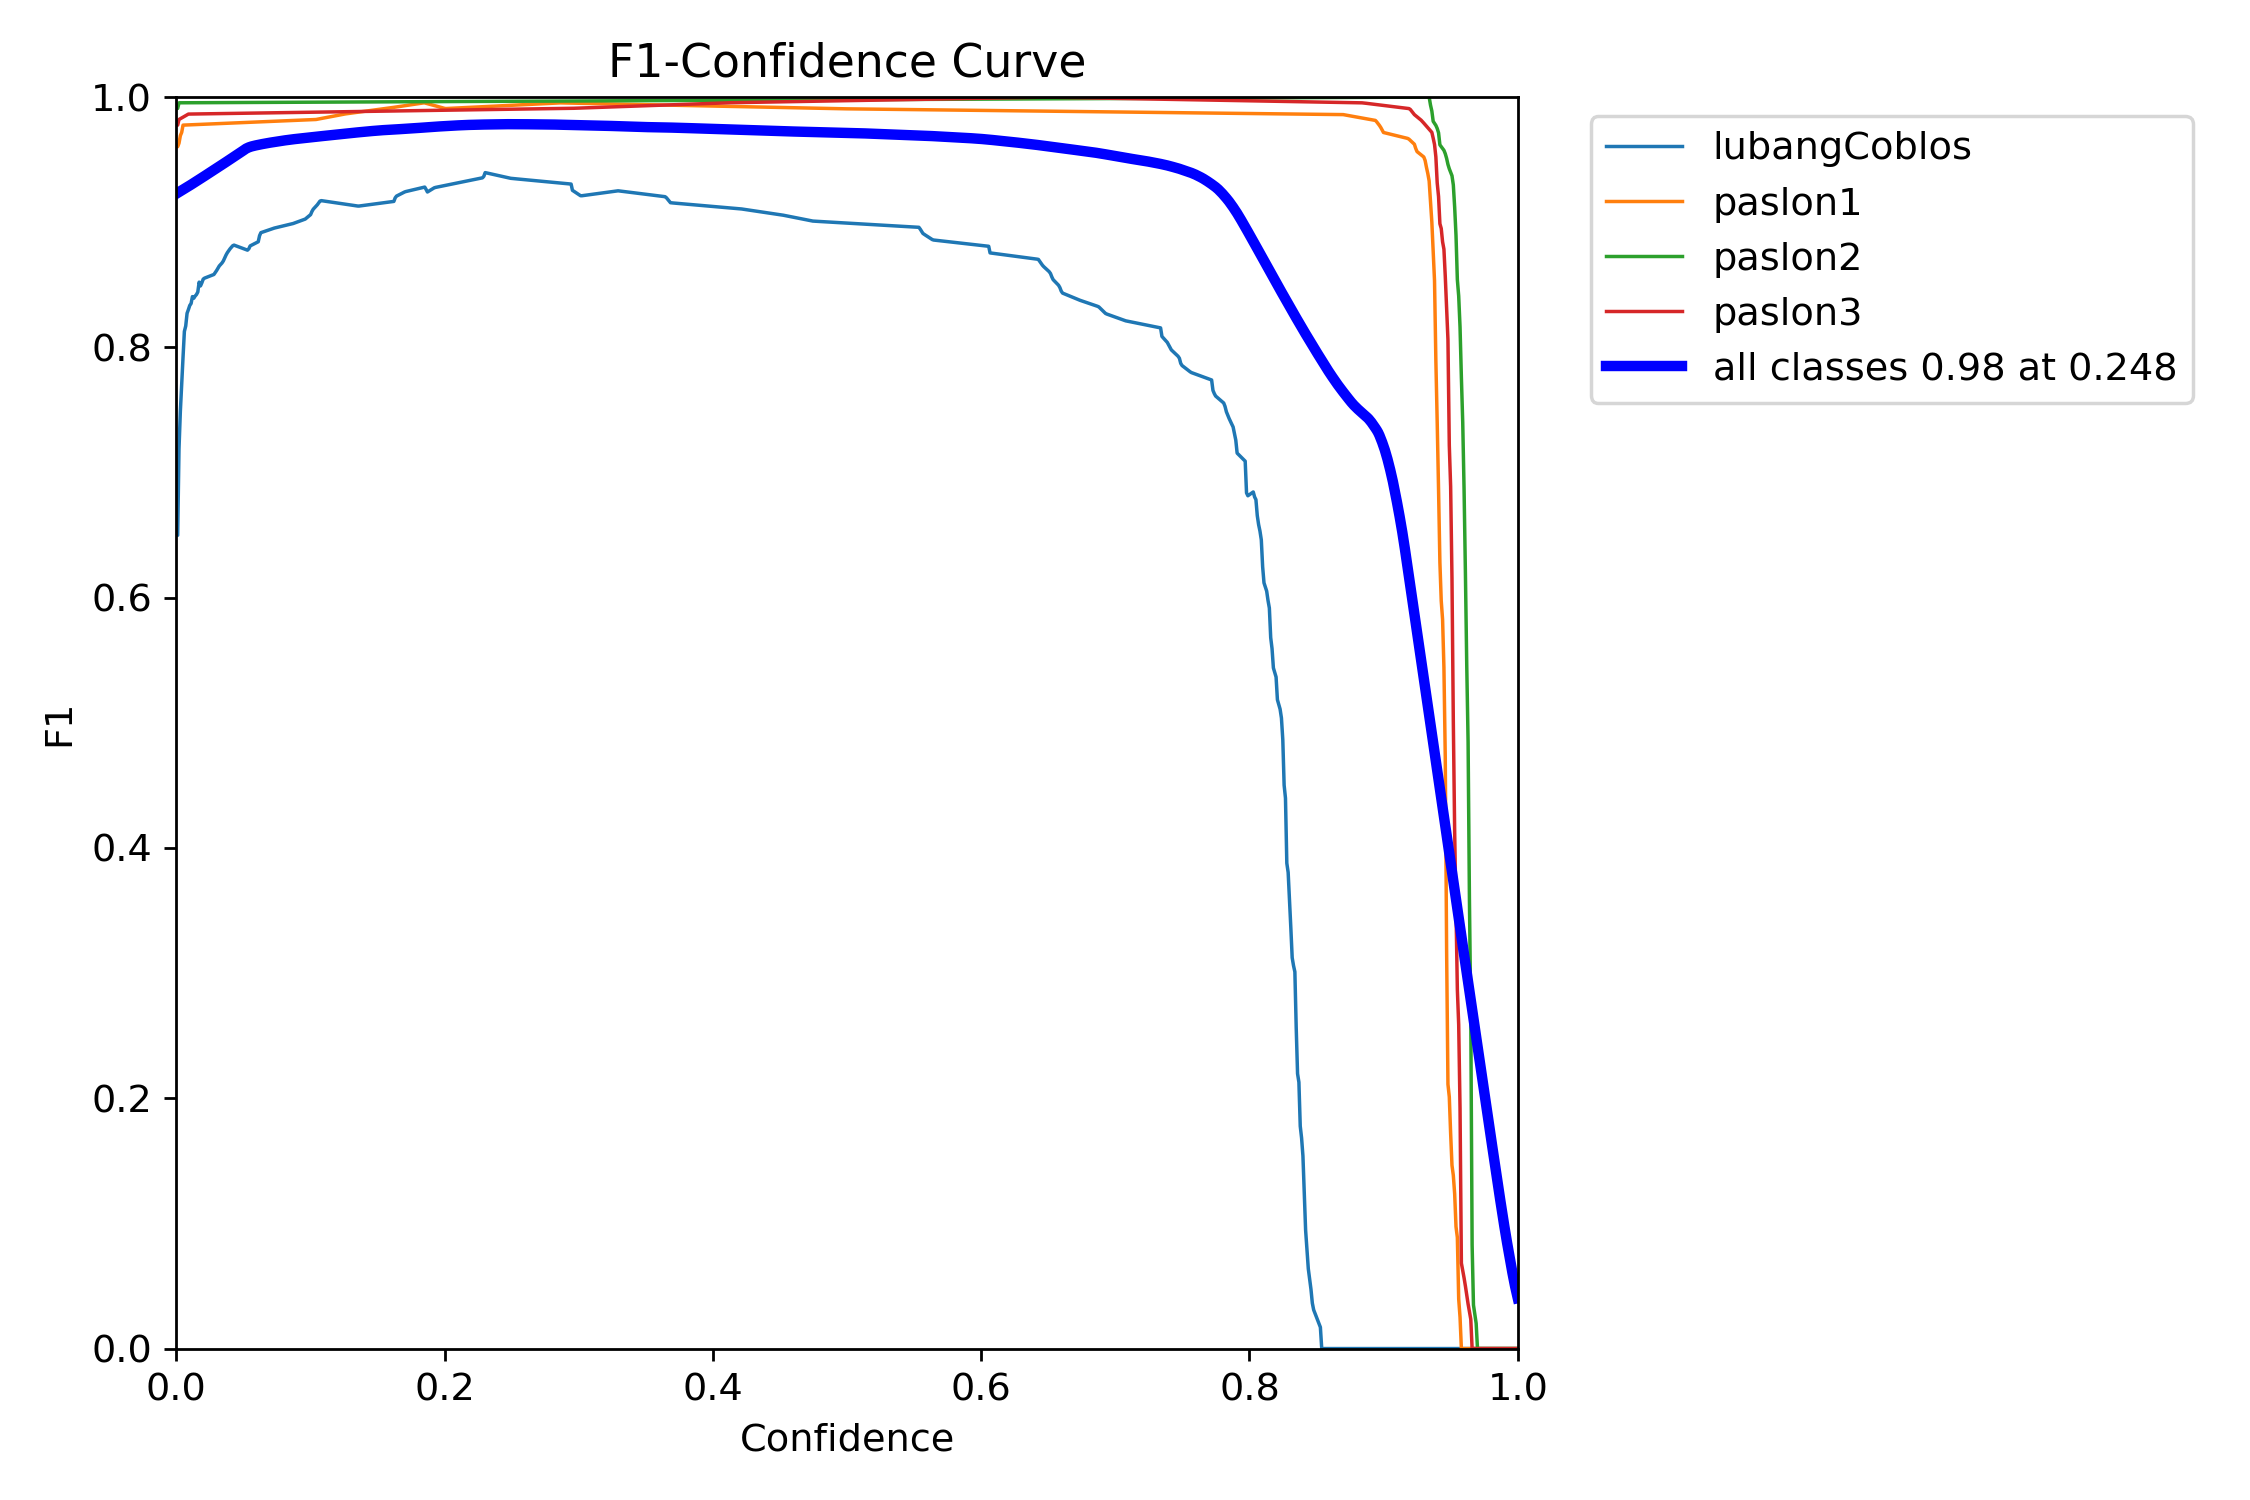

In [ ]:
Image(filename=f'/content/runs/detect/train/F1_curve.png', width=800)

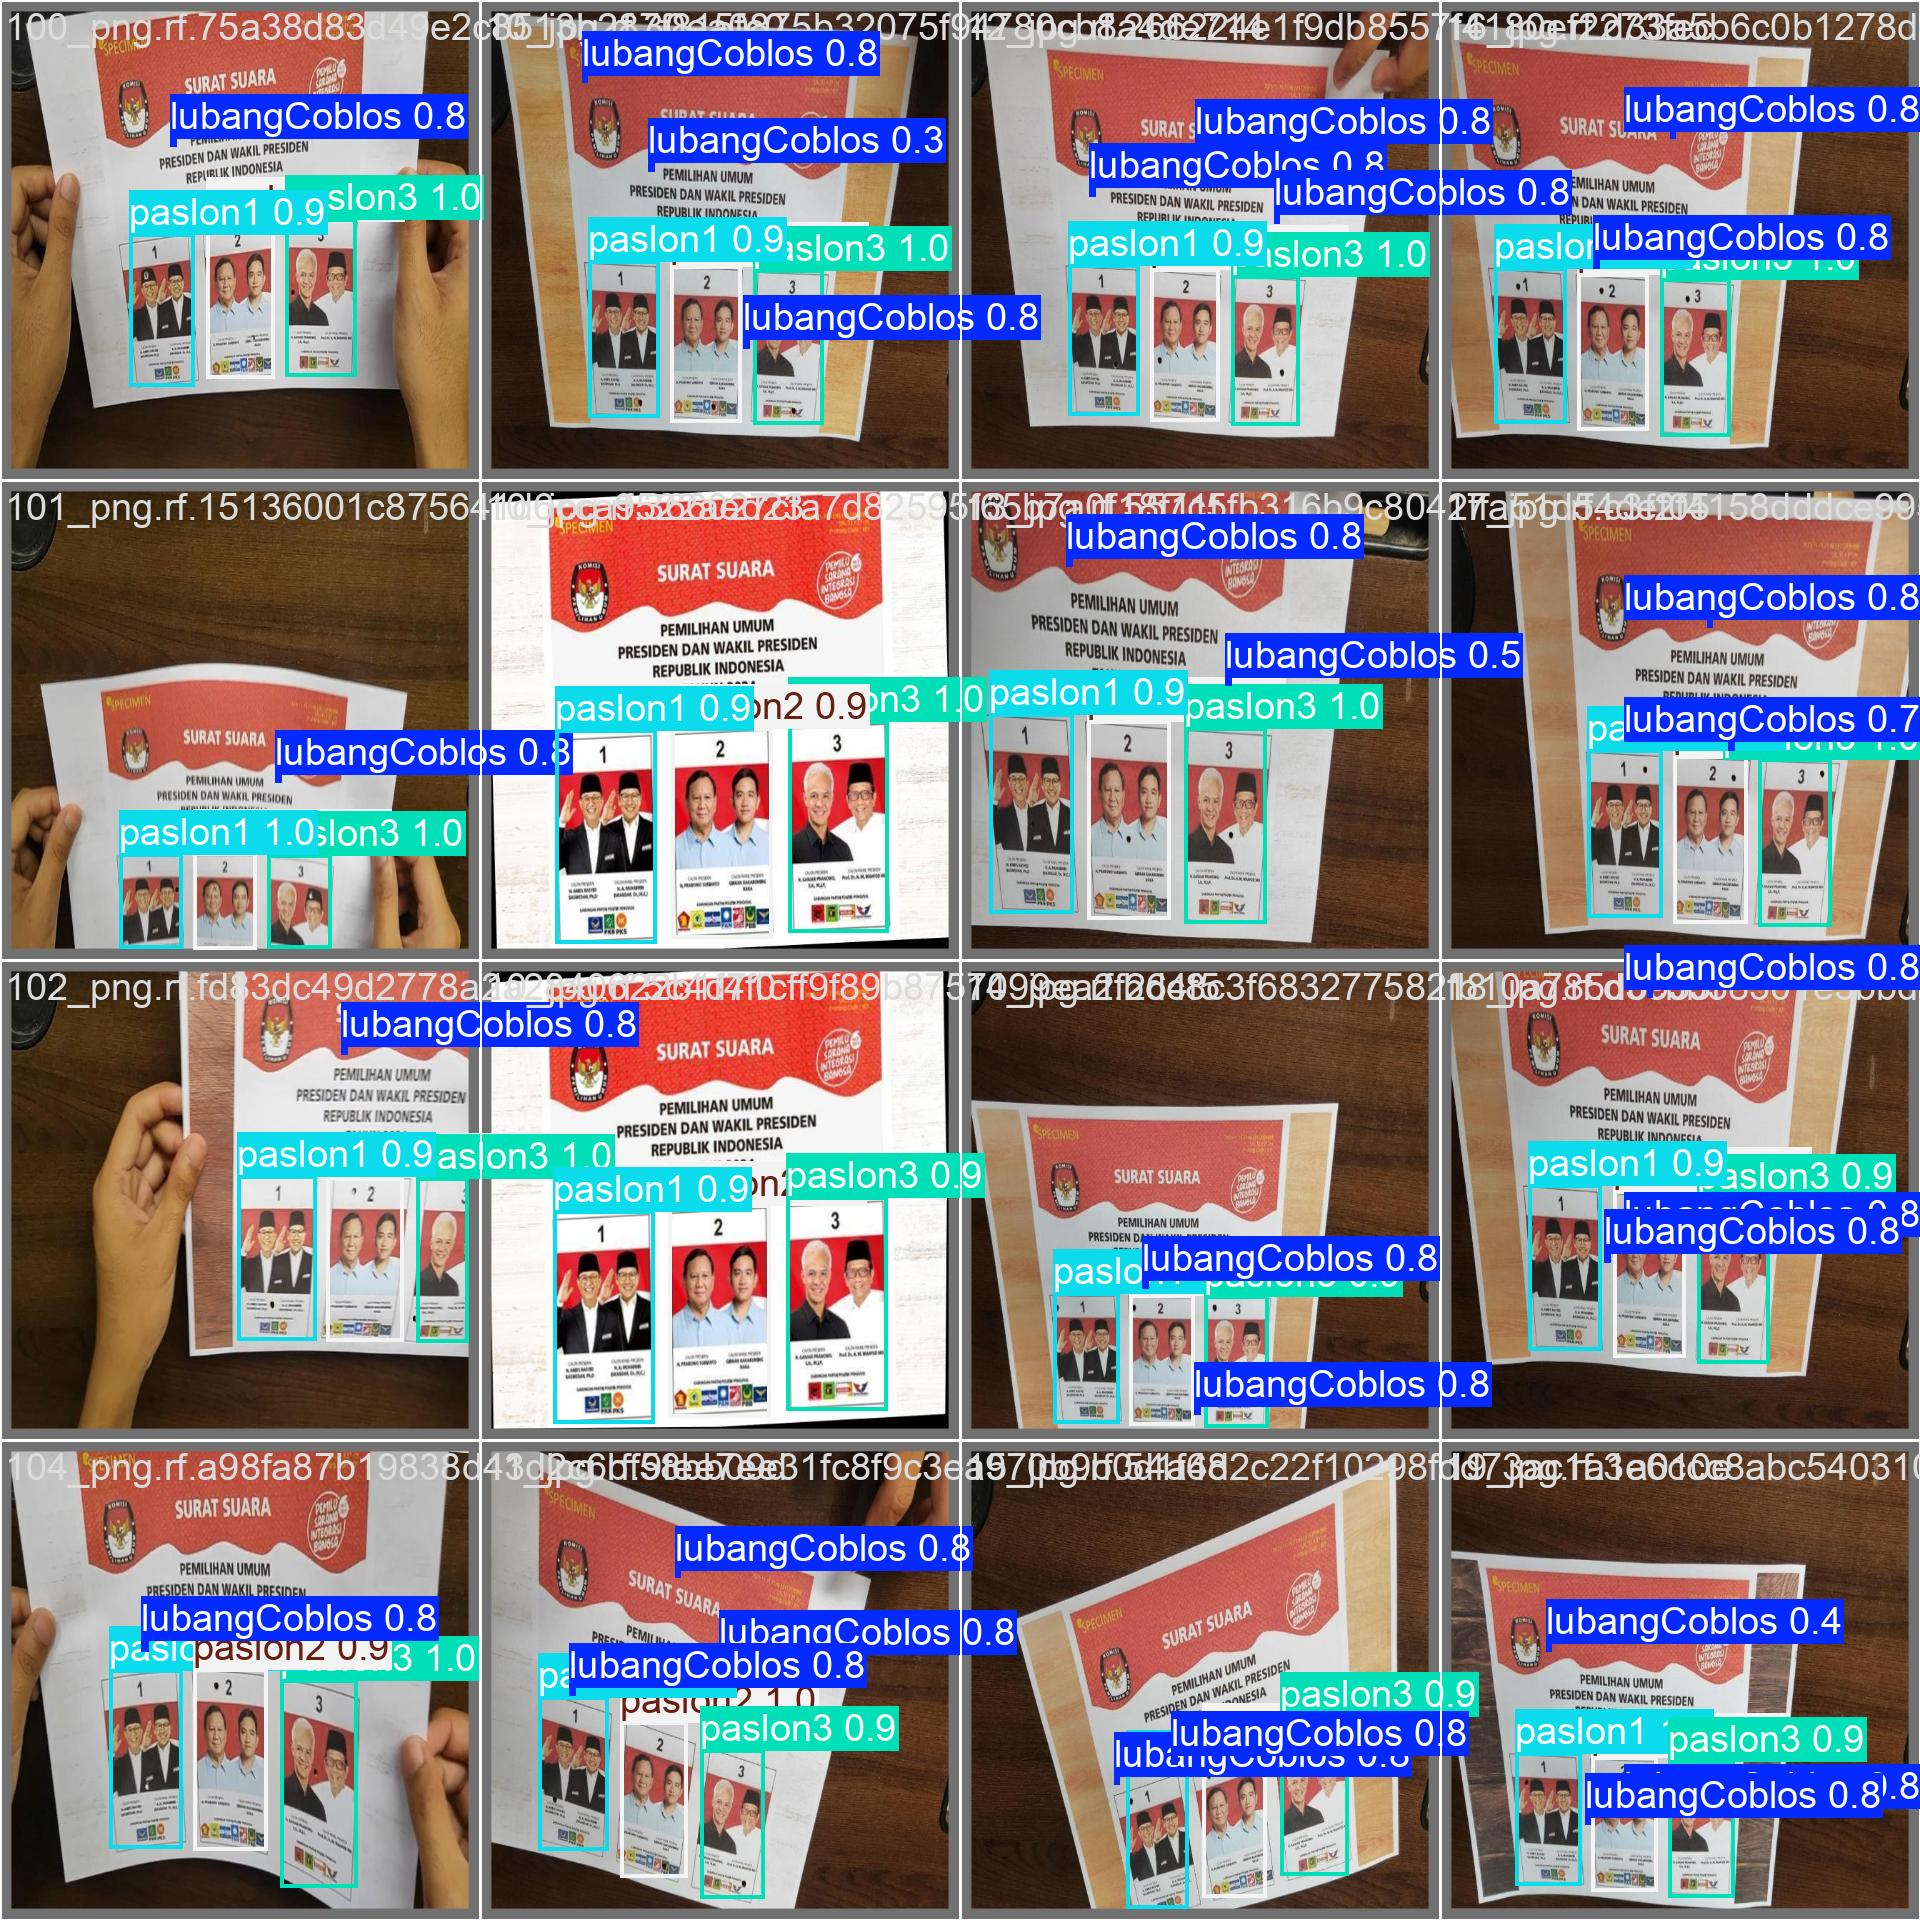

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=500)

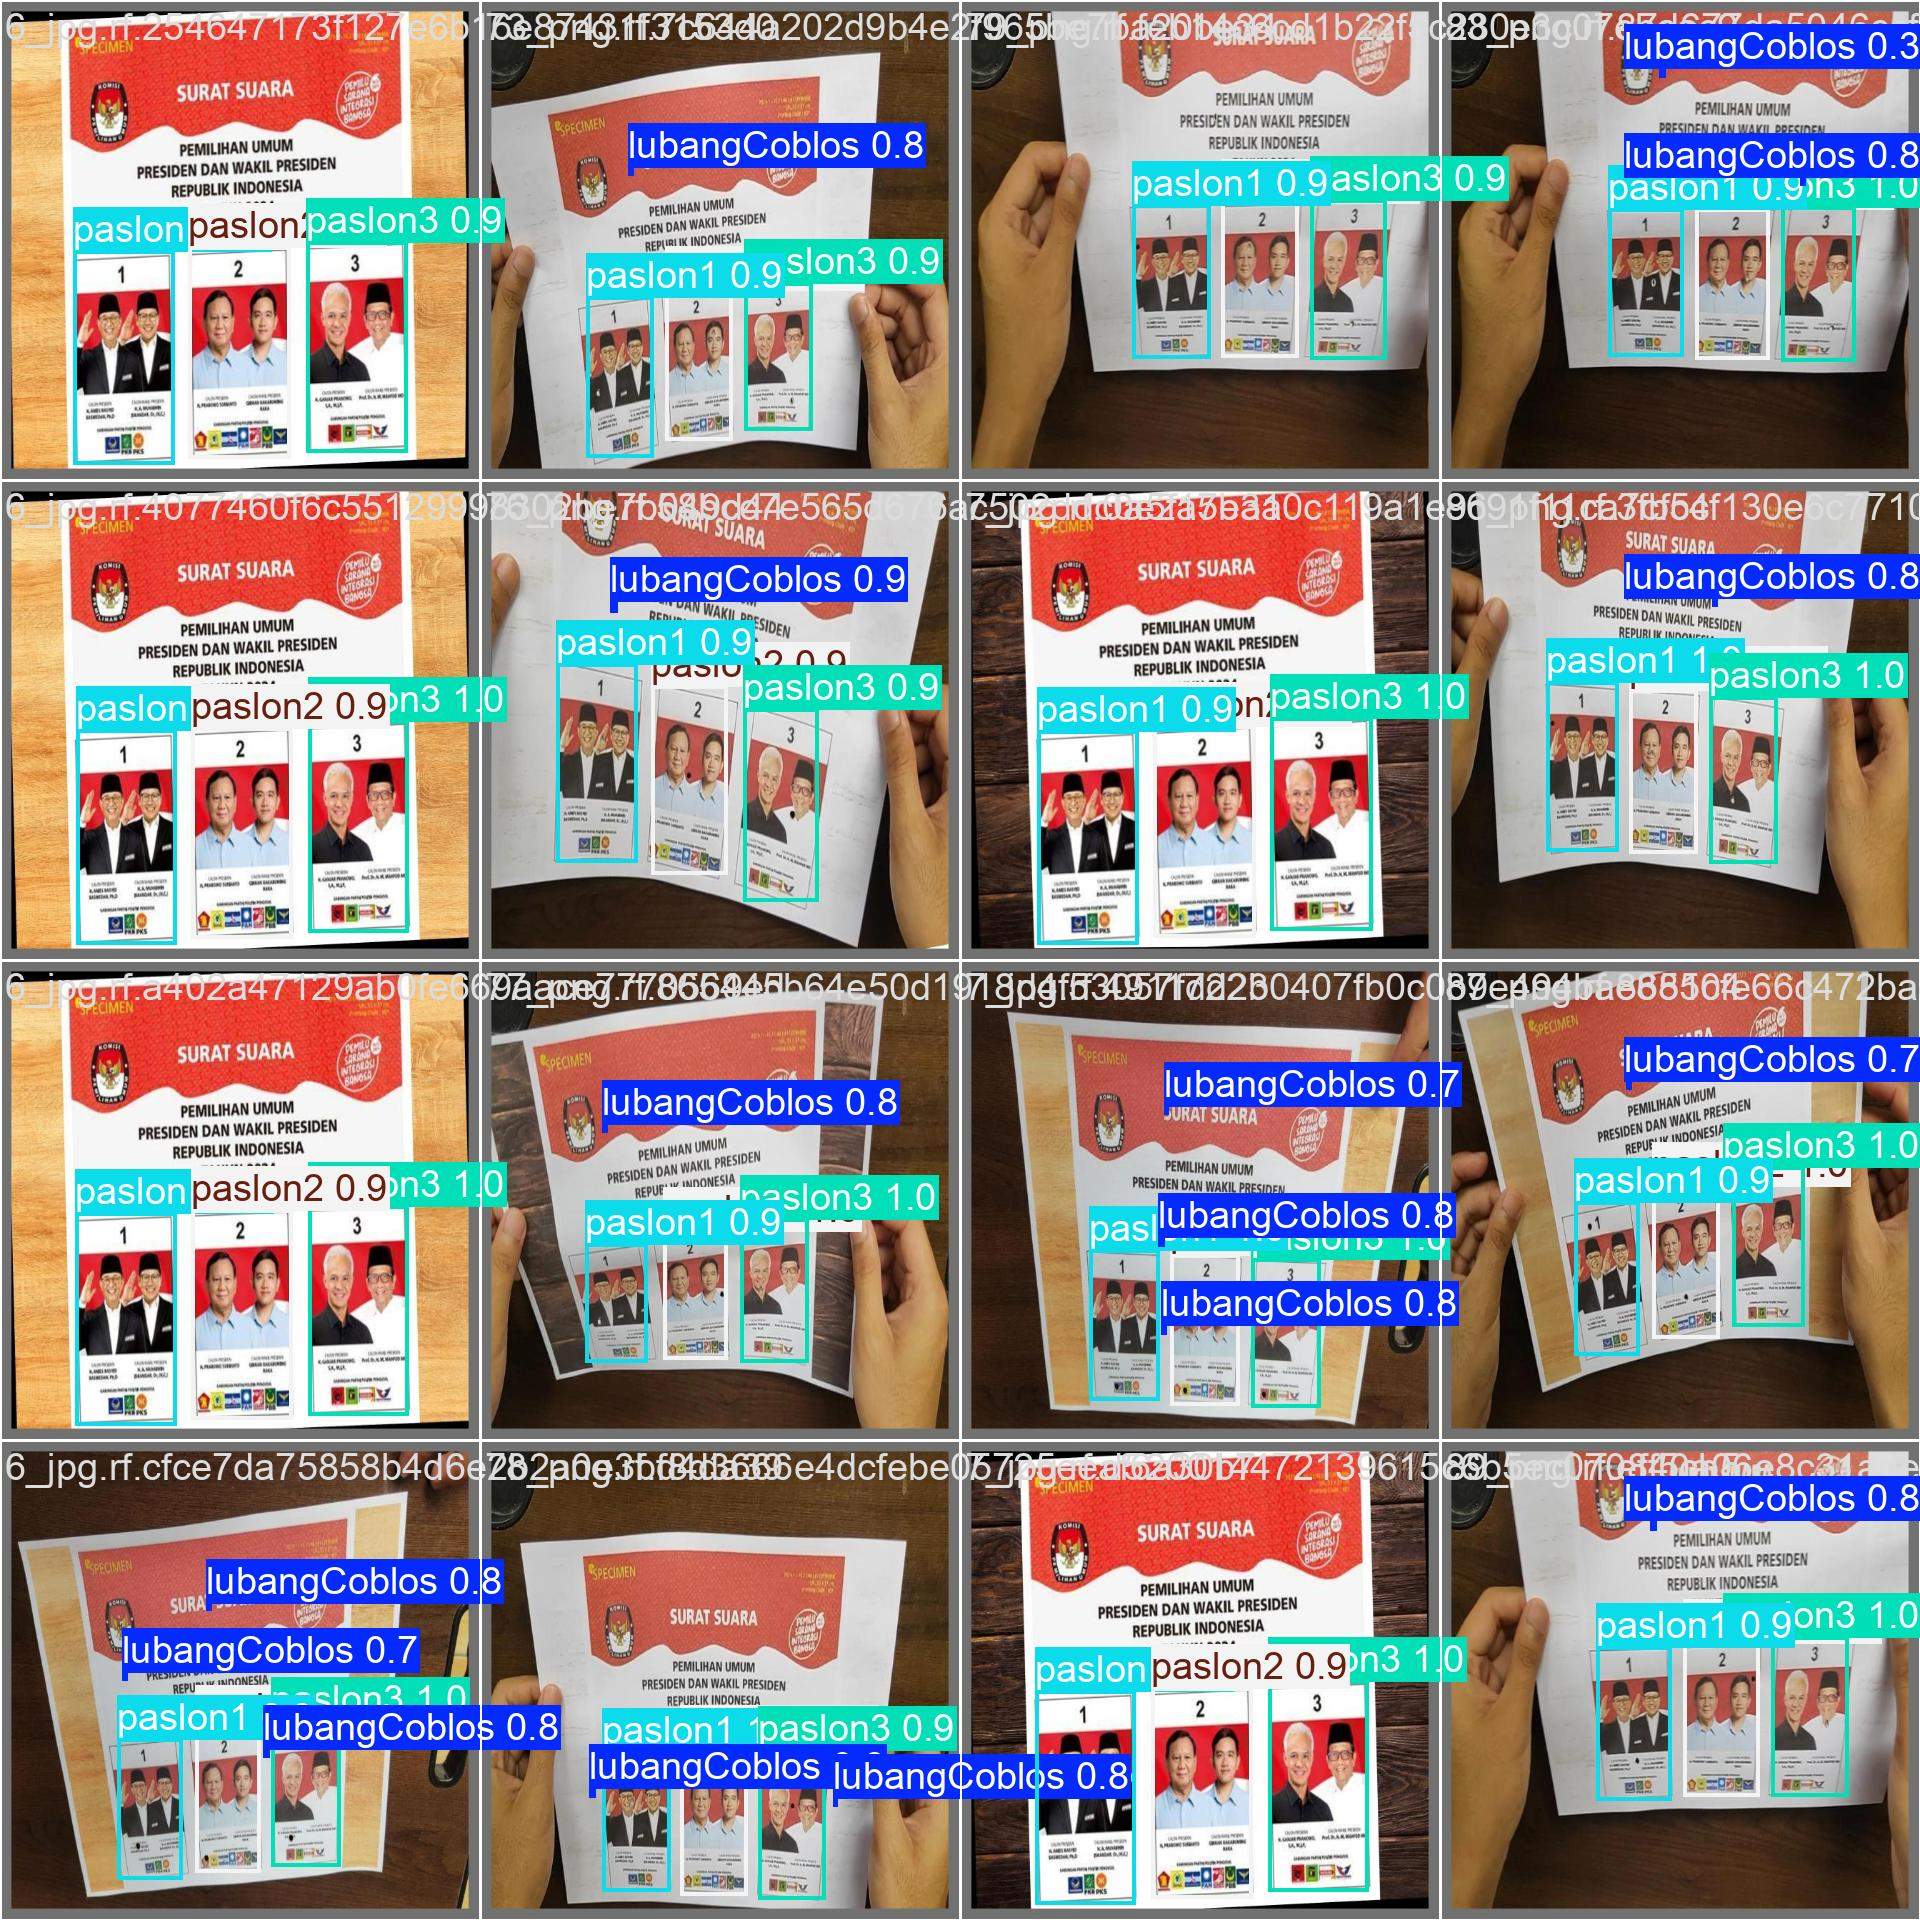

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch1_pred.jpg', width=500)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Skripsi2025---Pre1-2/data.yaml

Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10s summary (fused): 106 layers, 7,219,548 parameters, 0 gradients, 21.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1703.3±301.4 MB/s, size: 54.2 KB)
val: Scanning /content/Skripsi2025---Pre1-2/valid/labels.cache... 109 images, 0 backgrounds, 0 corrupt: 100% 109/109 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:04<00:00,  1.55it/s]
                   all        109        447      0.987      0.974      0.985      0.812
          lubangCoblos         64        120      0.973      0.902      0.954      0.498
               paslon1        109        109          1      0.995      0.995      0.892
               paslon2        109        109      0.993          1      0.995      0.942
               paslon3        109        109       0.98          1      0.995      0.916
Speed: 9.6ms preprocess, 10.5ms inference, 0.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

results = model.predict(source='/content/gdrive/MyDrive/Skripsi Colab/Datatest', conf=0.8, save=True)


image 1/81 /content/gdrive/MyDrive/Skripsi Colab/Datatest/102.png: 384x640 1 paslon1, 1 paslon2, 1 paslon3, 87.2ms
image 2/81 /content/gdrive/MyDrive/Skripsi Colab/Datatest/104.png: 384x640 1 lubangCoblos, 1 paslon1, 1 paslon2, 1 paslon3, 14.7ms
image 3/81 /content/gdrive/MyDrive/Skripsi Colab/Datatest/16.jpg: 384x640 1 paslon1, 1 paslon2, 1 paslon3, 10.1ms
image 4/81 /content/gdrive/MyDrive/Skripsi Colab/Datatest/164.png: 384x640 1 lubangCoblos, 1 paslon1, 1 paslon2, 1 paslon3, 10.1ms
image 5/81 /content/gdrive/MyDrive/Skripsi Colab/Datatest/165.png: 384x640 1 paslon1, 1 paslon2, 1 paslon3, 10.1ms
image 6/81 /content/gdrive/MyDrive/Skripsi Colab/Datatest/166.png: 384x640 1 paslon1, 1 paslon2, 1 paslon3, 10.8ms
image 7/81 /content/gdrive/MyDrive/Skripsi Colab/Datatest/167.png: 384x640 1 paslon1, 1 paslon2, 1 paslon3, 10.1ms
image 8/81 /content/gdrive/MyDrive/Skripsi Colab/Datatest/168.png: 384x640 1 lubangCoblos, 1 paslon1, 1 paslon2, 1 paslon3, 10.2ms
image 9/81 /content/gdrive/MyDri

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:54]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
import shutil
import os

source = '/content/runs'
destination = '/content/drive/MyDrive/ModelOD/Yolov10s_50'

# Buat folder tujuan jika belum ada
os.makedirs(destination, exist_ok=True)

# Salin dengan logging
print(f"Menyalin dari {source} ke {destination}...")
shutil.copytree(source, destination, dirs_exist_ok=True)
print("Selesai!")

# Verifikasi setelah menyalin
!ls -la '{destination}'

Menyalin dari /content/runs ke /content/drive/MyDrive/ModelOD/Yolov10s_50...
Selesai!
total 12
drwxr-xr-x 3 root root 4096 May 23 13:58 .
drwxr-xr-x 3 root root 4096 May 23 14:40 ..
drwxr-xr-x 5 root root 4096 May 23 14:37 detect


In [ ]:
import shutil

# Membuat file zip dari folder 'runs'
shutil.make_archive('SkripsiYoloV10s_50', 'zip', 'runs')

'/content/SkripsiYoloV10s_50.zip'